# Unsupervised Classification Using Kmeans

This code is heavily guided by Katy Sill's github repo on unsupervised classification using kmeans: https://github.com/katysill/flood-detection/blob/master/final_notebooks/final_unsupervised_ML_accuracy_scores_koumassi.ipynb

It will begin with a Landsat 8 Level-2 scene, cropped and stacked area of interest (to review this process, please see Landsat8-cropped-and-stacked.ipynb).  It will run with 7 classifiers, however, research and exploration will be necessary to identify the number of classifiers that best represent your area of interest.

In [1]:
# Import packages
import os
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
import pandas as pd
from glob import glob
import rasterio as rio
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et
from skimage import measure
from skimage import morphology
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
# Download sample data (ONAQ NEON site)



In [3]:
# Set working path
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Set input and output paths
output_dir = os.path.join("data", "Landsat", "outputs")
if os.path.isdir(output_dir) == False:
    os.mkdir(output_dir)
    
stacked_img_path = os.path.join (output_dir, 'stacked_aoi.tif')
kmeans_output_path = os.path.join(output_dir, 'classified_aoi.tif')

In [4]:
# Open raster stack and make copies of meta file for use in writing out files later
with rio.open(stacked_img_path) as src:
    all_bands_stack = src.read()
    stack_meta = src.meta
    files_out_meta = src.meta.copy()
files_out_meta['count'] = 1

In [5]:
#### TEST OUT THE CLEANING UP OF THE STACK DATA HERE - MNF etc.


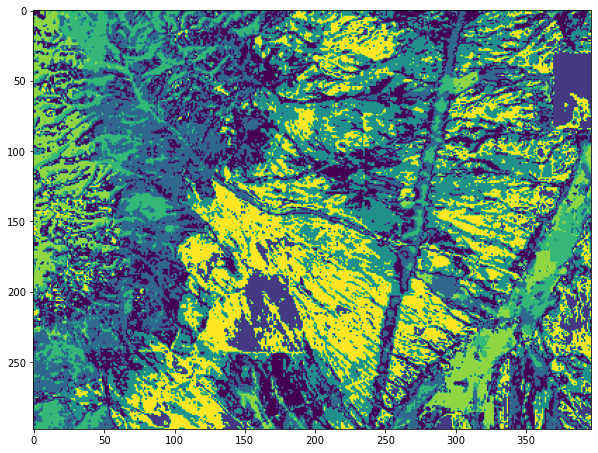

In [9]:
# Define k-means classifier
nclass = 7
clf_kmeans = KMeans(n_clusters=nclass, random_state=10)

# Fit the KMeans classifier to the 7-band raster stack
all_bands_im = np.rollaxis(all_bands_stack, 0, 3)
X_all_bands_stack = all_bands_im.reshape(-1, 7)
predictedClass_all_bands = clf_kmeans.fit_predict(X_all_bands_stack, y=None)
predictedClass_all_bands += 1

# Plot the result
fig, ax = plt.subplots(figsize=(10, 10))
pred_data_all_bands = predictedClass_all_bands.reshape(all_bands_im.shape[:2])
ax.imshow(pred_data_all_bands)
plt.show()

# Write out the resulting k-means map
with rio.open(kmeans_output_path, 'w', **files_out_meta) as dst:
    dst.write(pred_data_all_bands.astype('int16'), 1)
    
#####################################DOES NOT LIKE FLOAT32#############################
# Forces an int16???????

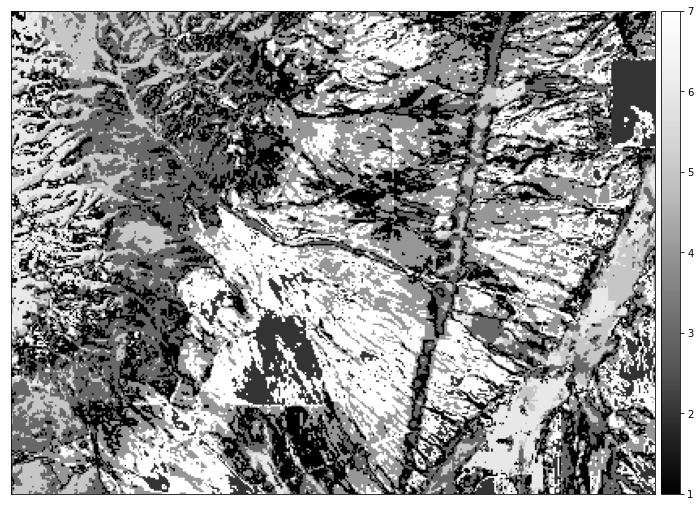

In [10]:
with rio.open(kmeans_output_path) as src:
    classified_raster = src.read()
    raster_meta = src.meta
    
ep.plot_bands(classified_raster)

In [13]:
classified_raster.shape

all_bands_stack.shape

(7, 298, 397)